In [1]:
!pip install numpy matplotlib scikit-learn tensorflow
#https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


C=0.01, gamma=0.01, train_acc=0.6298, test_acc=0.6670
C=0.01, gamma=0.1, train_acc=0.1147, test_acc=0.1300
C=0.01, gamma=1, train_acc=0.1147, test_acc=0.1300
C=0.01, gamma=10, train_acc=0.1147, test_acc=0.1300
C=0.01, gamma=100, train_acc=0.1147, test_acc=0.1300
C=0.1, gamma=0.01, train_acc=0.9270, test_acc=0.9320
C=0.1, gamma=0.1, train_acc=0.2975, test_acc=0.2880
C=0.1, gamma=1, train_acc=0.1147, test_acc=0.1300
C=0.1, gamma=10, train_acc=0.1147, test_acc=0.1300
C=0.1, gamma=100, train_acc=0.1147, test_acc=0.1300
C=1, gamma=0.01, train_acc=0.9788, test_acc=0.9630
C=1, gamma=0.1, train_acc=1.0000, test_acc=0.8580
C=1, gamma=1, train_acc=1.0000, test_acc=0.1300
C=1, gamma=10, train_acc=1.0000, test_acc=0.1300
C=1, gamma=100, train_acc=1.0000, test_acc=0.1300
C=10, gamma=0.01, train_acc=1.0000, test_acc=0.9650
C=10, gamma=0.1, train_acc=1.0000, test_acc=0.8650
C=10, gamma=1, train_acc=1.0000, test_acc=0.1300
C=10, gamma=10, train_acc=1.0000, test_acc=0.1300
C=10, gamma=100, train_acc=1.

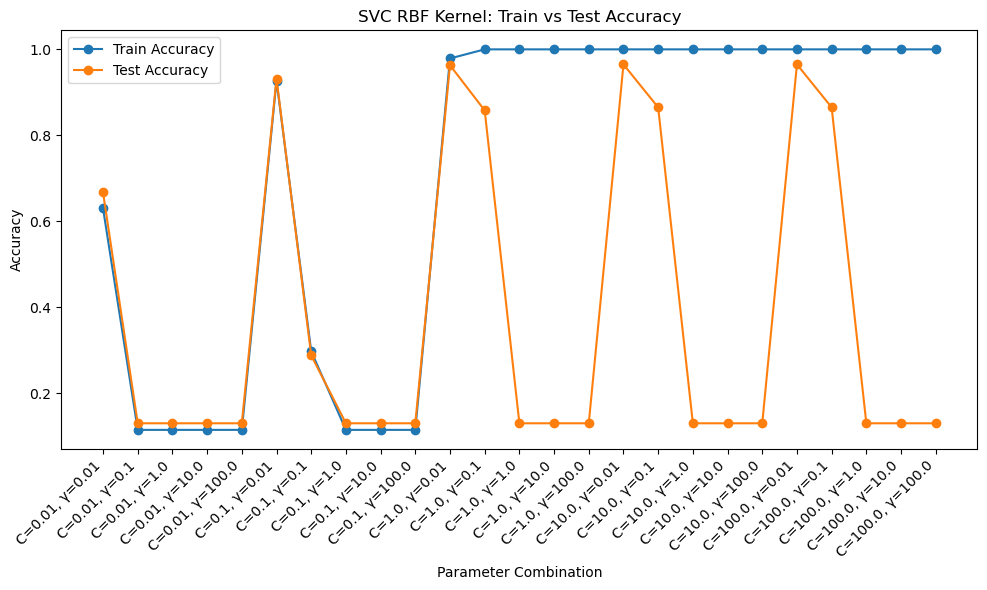

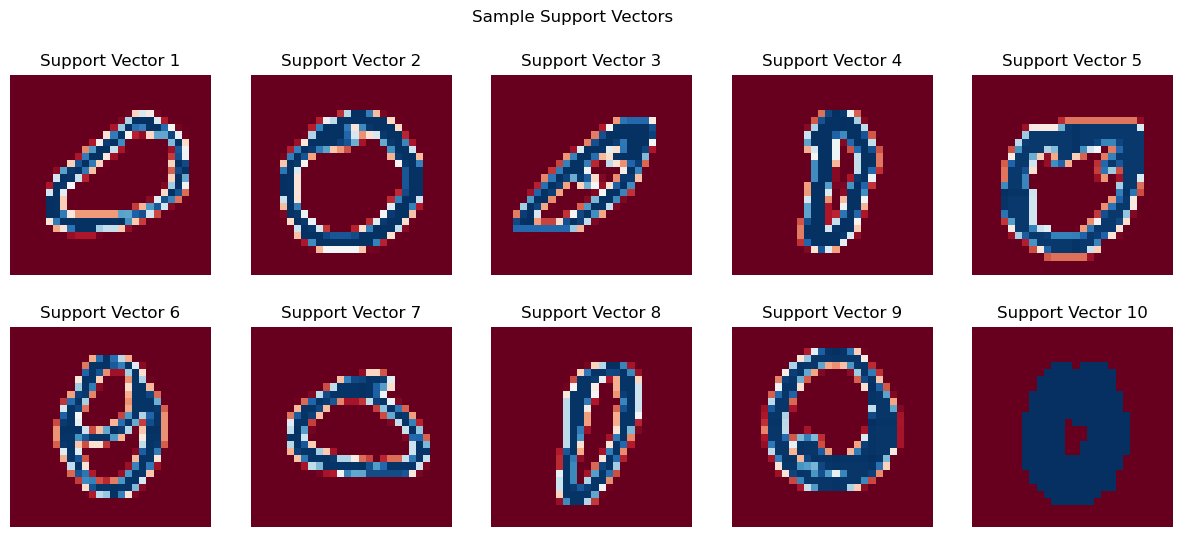

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.datasets import mnist
import pandas as pd

# Load MNIST data
(train, trlab), (test, tslab) = mnist.load_data()
train = train.reshape(-1, 28*28) / 255.0
test = test.reshape(-1, 28*28) / 255.0

# Combine train and validation datasets
train = np.concatenate([train], axis=0)
trlab = np.concatenate([trlab], axis=0)

# Sample 10% of the data
np.random.seed(0)
train_indices = np.random.choice(len(train), 6000, replace=False)
test_indices = np.random.choice(len(test), 1000, replace=False)

train_samp = train[train_indices]
trlab_samp = trlab[train_indices]

test_samp = test[test_indices]
tslab_samp = tslab[test_indices]

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
grid = ParameterGrid(param_grid)
results = []

for params in grid:
    c, gamma = params['C'], params['gamma']
    svm = SVC(kernel='rbf', C=c, gamma=gamma)
    svm.fit(train_samp, trlab_samp)

    train_pred = svm.predict(train_samp)
    train_acc = accuracy_score(trlab_samp, train_pred)

    test_pred = svm.predict(test_samp)
    test_acc = accuracy_score(tslab_samp, test_pred)

    results.append([c, gamma, train_acc, test_acc])
    print(f"C={c}, gamma={gamma}, train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")

df = pd.DataFrame(results, columns=['C', 'gamma', 'train_acc', 'test_acc'])
print(df)

# Plot train and test accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(df)), df['train_acc'], label='Train Accuracy', marker='o')
ax.plot(range(len(df)), df['test_acc'], label='Test Accuracy', marker='o')
ax.set_xticks(range(len(df)))
ax.set_xticklabels([f"C={row['C']}, γ={row['gamma']}" for _, row in df.iterrows()], rotation=45, ha='right')
ax.set_title("SVC RBF Kernel: Train vs Test Accuracy")
ax.set_xlabel("Parameter Combination")
ax.set_ylabel("Accuracy")
ax.legend()
plt.tight_layout()
plt.show()

# Analyze support vectors for the best model (C=10, gamma=0.01)
best_model = SVC(kernel='rbf', C=10, gamma=0.01)
best_model.fit(train_samp, trlab_samp)
support_indices = best_model.support_

# Visualize some support vectors
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flatten()):
    if i < len(support_indices):
        sv_image = train_samp[support_indices[i]].reshape(28, 28)
        ax.imshow(sv_image, cmap='RdBu')
        ax.set_title(f"Support Vector {i+1}")
        ax.axis('off')
plt.suptitle("Sample Support Vectors")
plt.show()
